# Learning rule and dynamical range

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence, create_sequence_chain
from analysis import time_t1, time_t2, time_t1_local, time_t2_local, time_t2_complicated
from network import run_network_recall_limit_end


## A simple example for debuggin and visualization

self 4.89023809897 exc -1.04625510463 inh -9.99999845741


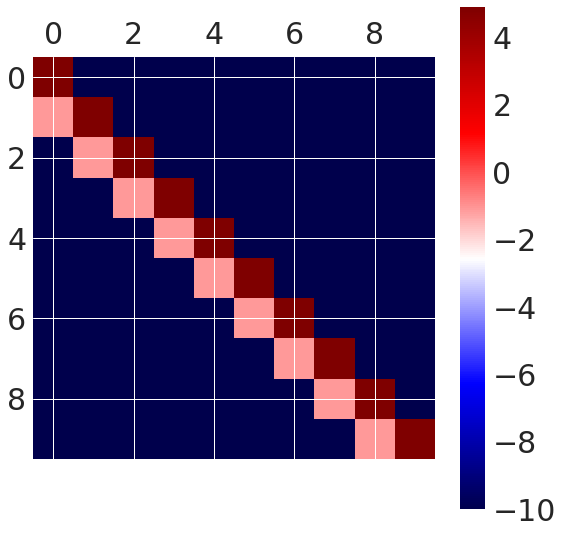

In [27]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
training_time = 0.600
inter_sequence_time = 1.0
max_w = 5.0
min_w = -10.0

threshold = 0.5
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.050
epochs = 4

G = 100.0
tau_m = 0.010
T = 5.0
I_cue = 0
I_end = 5
T_cue = tau_z
dt = 0.001

pre_rule = False

pattern = 3
pattern_from = 2

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=epochs, max_w=max_w, min_w=min_w, pre_rule=pre_rule)

w = dic['w']

self = w[pattern, pattern]
exc = w[pattern, pattern_from]
inh = w[pattern_from, pattern]
print('self', self, 'exc', exc, 'inh', inh)

dic = run_network_recall_limit_end(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, I_end, T_cue)
x_history = dic['x']
duration = get_recall_duration_for_pattern(x_history, pattern, dt)



plt.matshow(w, cmap='seismic')
plt.colorbar();

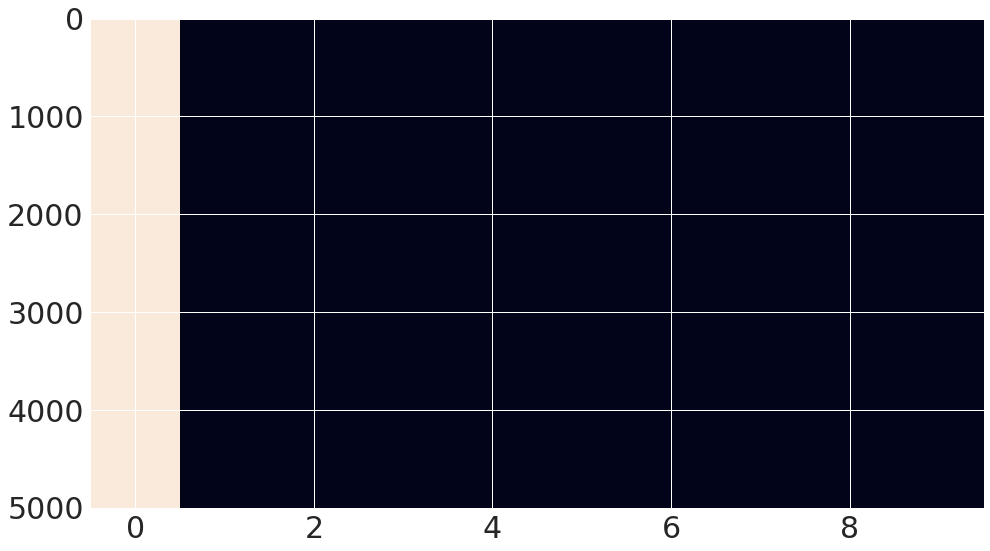

In [26]:
plt.imshow(x_history, aspect='auto');

## Systematic for transition

In [31]:
w_max_vector = np.arange(1.0, 10.0, 0.5)
w_min_vector = -np.arange(1.0, 10.0, 0.5)

N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
training_time = 0.600
inter_sequence_time = 1.0
max_w = 5.0
min_w = -10.0

threshold = 0.5
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.050
epochs = 4

G = 100.0
tau_m = 0.010
T = 10.0
I_cue = 0
I_end = 5
T_cue = tau_z
dt = 0.001

pre_rule = False

pattern = 3
pattern_from = 2

transition_array = np.zeros((w_max_vector. size, w_min_vector.size))
self_array = np.zeros((w_max_vector. size, w_min_vector.size))
inh_array = np.zeros((w_max_vector. size, w_min_vector.size))

recall_array = np.zeros_like(transition_array)

for w_max_index, max_w in enumerate(w_max_vector):
    print(max_w)
    for w_min_index, min_w in enumerate(w_min_vector):
        dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=epochs, max_w=max_w, min_w=min_w, pre_rule=pre_rule)

        w = dic['w']

        self = w[pattern, pattern]
        exc = w[pattern, pattern_from]
        inh = w[pattern_from, pattern]

        dic = run_network_recall_limit_end(N, w, G, threshold, tau_m, tau_z, T, dt, I_cue, I_end, T_cue)
        x_history = dic['x']
        duration = get_recall_duration_for_pattern(x_history, pattern, dt)
        
        transition_array[w_max_index, w_min_index] = exc
        self_array[w_max_index, w_min_index] = self
        inh_array[w_max_index, w_min_index] = inh
        recall_array[w_max_index, w_min_index] = duration

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0
5.5
6.0
6.5
7.0
7.5
8.0
8.5
9.0
9.5


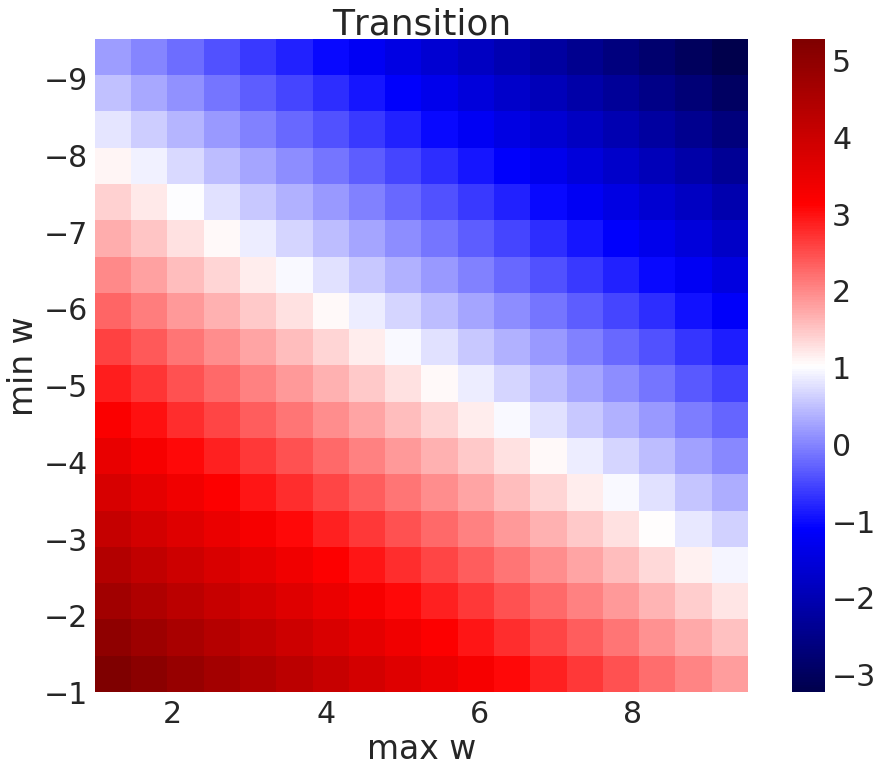

In [41]:
extent = [w_max_vector[0], w_max_vector[-1], w_min_vector[0], w_min_vector[-1]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.grid()
ax.set_title('Transition')
im = ax.imshow(transition_array, aspect='equal', extent=extent, cmap='seismic')
plt.colorbar(im)

ax.set_ylabel('min w')
ax.set_xlabel('max w')

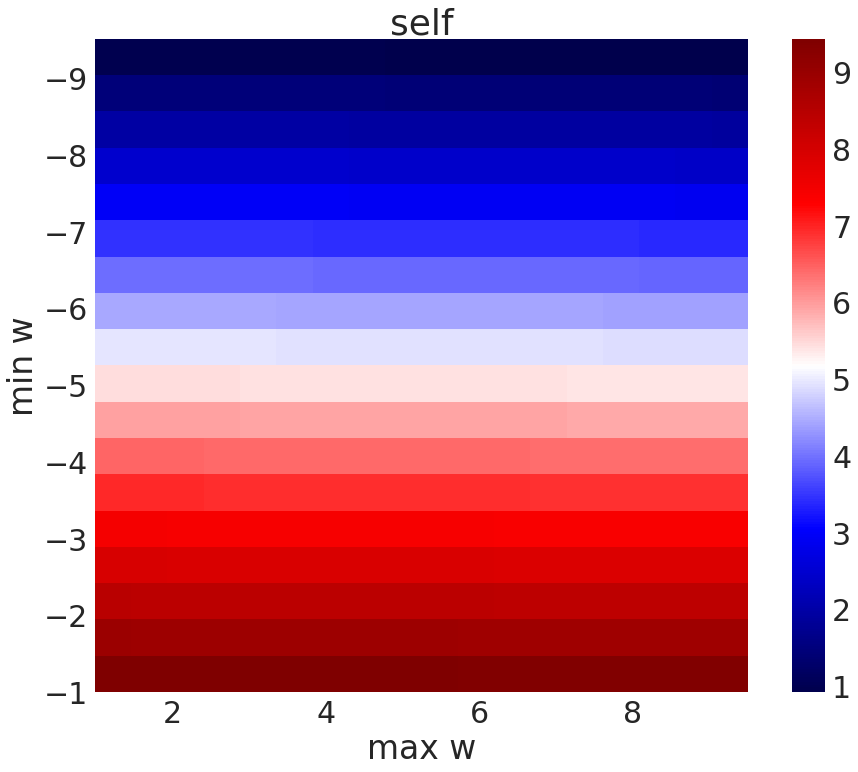

In [43]:
extent = [w_max_vector[0], w_max_vector[-1], w_min_vector[0], w_min_vector[-1]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.grid()
ax.set_title('self')
im = ax.imshow(self_array, aspect='equal', extent=extent, cmap='seismic')
plt.colorbar(im)

ax.set_ylabel('min w')
ax.set_xlabel('max w')

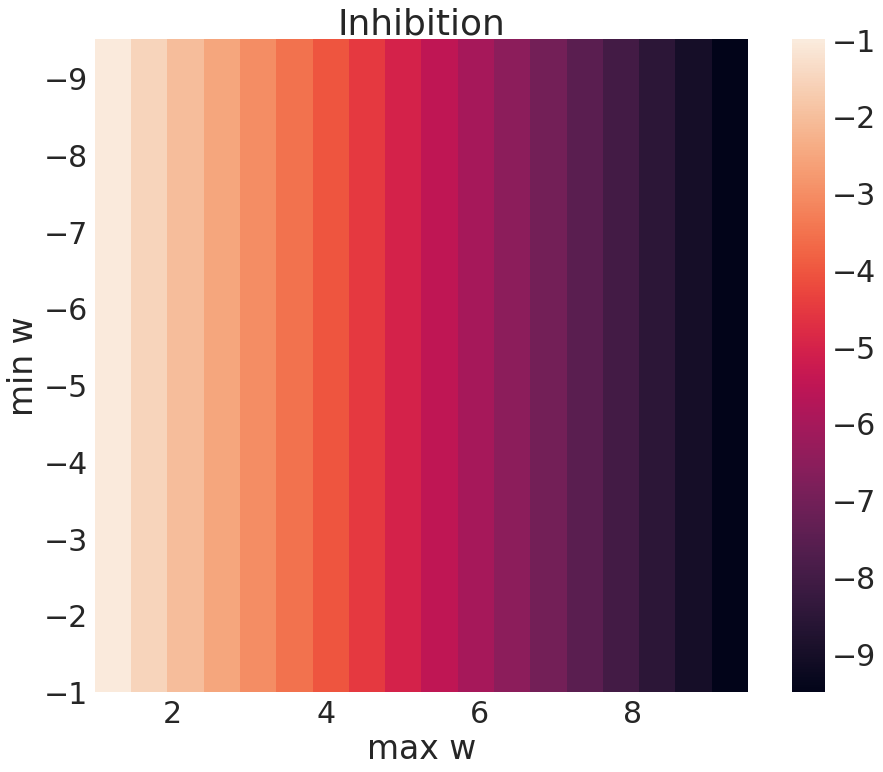

In [44]:
extent = [w_max_vector[0], w_max_vector[-1], w_min_vector[0], w_min_vector[-1]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.set_title('Inhibition')
ax.grid()
im = ax.imshow(inh_array, aspect='equal', extent=extent)
plt.colorbar(im)

ax.set_ylabel('min w')
ax.set_xlabel('max w')

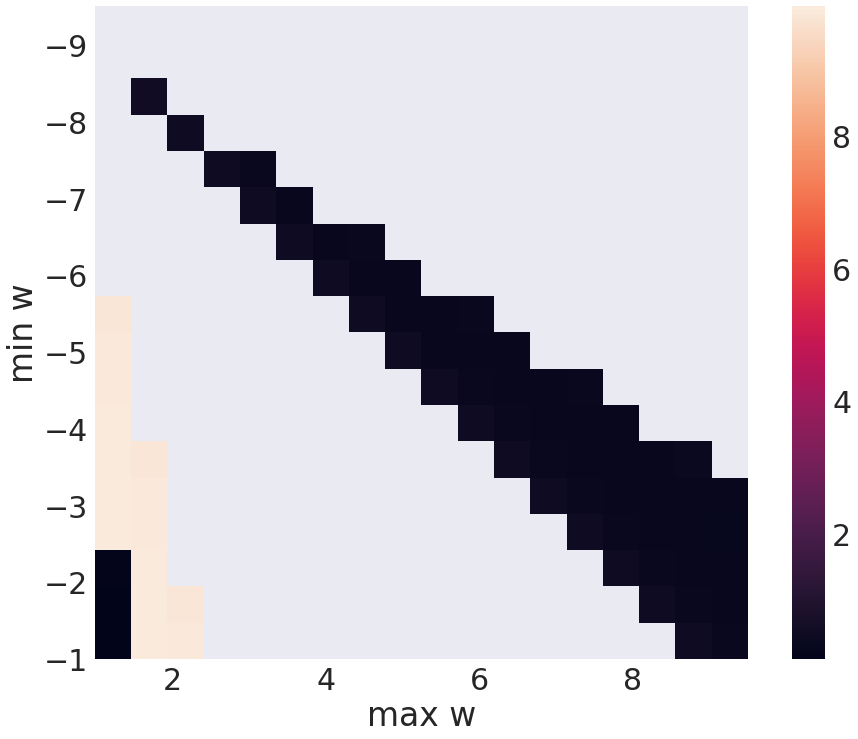

In [33]:
extent = [w_max_vector[0], w_max_vector[-1], w_min_vector[0], w_min_vector[-1]]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.grid()
im = ax.imshow(recall_array, aspect='equal', extent=extent)
plt.colorbar(im)

ax.set_ylabel('min w')
ax.set_xlabel('max w')

(array([ 59.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.]),
 array([ 0.108 ,  0.6006,  1.0932,  1.5858,  2.0784,  2.571 ,  3.0636,
         3.5562,  4.0488,  4.5414,  5.034 ,  5.5266,  6.0192,  6.5118,
         7.0044,  7.497 ,  7.9896,  8.4822,  8.9748,  9.4674,  9.96  ]),
 <a list of 20 Patch objects>)

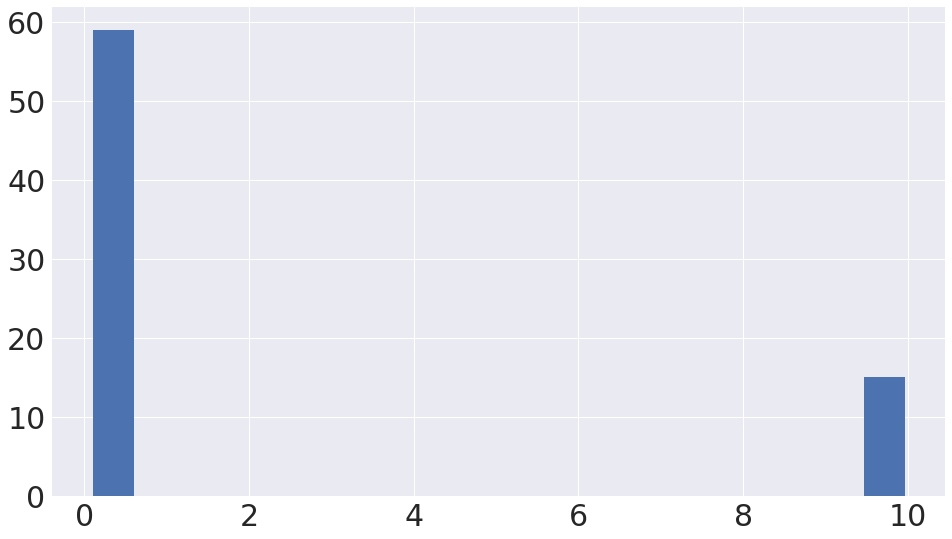

In [47]:
plt.hist(recall_array[~np.isnan(recall_array)], bins=20)

(0, 1)

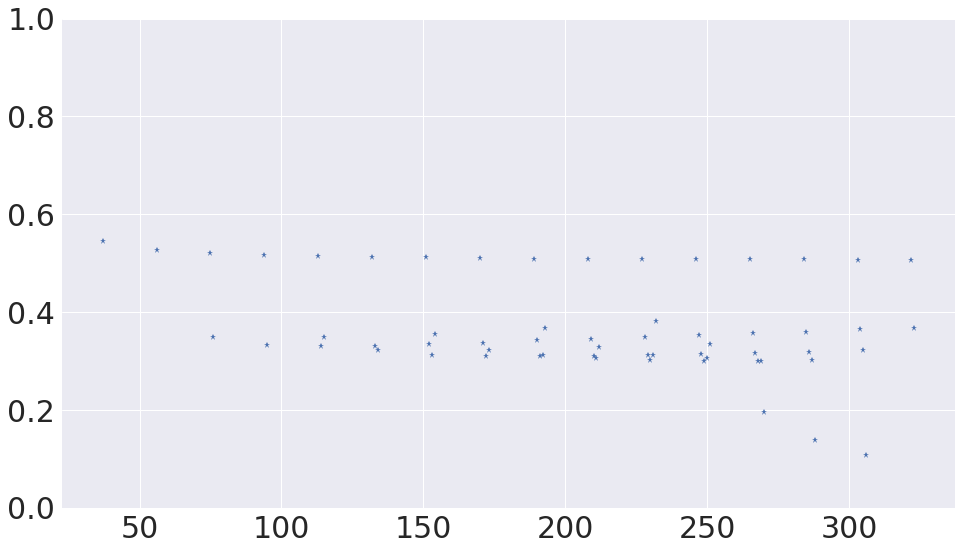

In [50]:
plt.plot(recall_array.flatten(), '*')
plt.ylim([0, 1])